# Surface Mass Balance: Time Series 

Import relevant Libaries 

In [1]:
%pip install pyarrow
%pip install plotly
%pip install feature_engine
%pip update pandas

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached feature_engine-1.5.2-py2.py3-none-any.whl (290 kB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.1.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update"



In [32]:
# Base libraries
import pandas as pd
import numpy as np
import os
import math as math
import datetime
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt

import plotly.express as pxs
import plotly.graph_objects as go
 
import seaborn as sns

Set WD

In [33]:
import os
from pyrsistent import v
os.getcwd()
#os.chdir('/Users/asgerlyngeholst-hansen/Desktop/Thesis/GEUS-Master-Thesis')
os.chdir('E:\GEUS-Master-Thesis')
#os.chdir('C:\\Users\\nifu18ab\\Desktop\\GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')

#### Load KM_L 

In [80]:
df = pd.read_csv('data/promice/preprocessed/daily/KAN_L.csv')

# Time Series

##### Pre-processing

In [81]:
# This bit to only focus on the time where we see Ice Ablation
# df = df[df["Ablation"] == True]

In [82]:
df.columns

Index(['index', 'stid', 'Air pressure (upper boom)',
       'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected', 'Albedo',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Cloud cover', 'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)', 'Unnamed: 48', 'Surface height 1.1',
       'Surface height from combined measurements', 'year', 'day', 'month',
       'DayOfYear', 'DayOfCentury', 'season', 'Ablation', 'Datetime',
       'Surface height from combined measurements DELTA', 'Melting Season'],
      dtype='object')

In [83]:
# This bit retrieve the indexes for all melting season categories and remove column from df
for category in ['pre','beginning', 'middle', 'end']:
    exec(f"indices_{category} = df[df['Melting Season'] == '{category}'].index")

df.drop(columns=['Melting Season'], inplace=True) 

In [84]:
df.columns.to_list()

['index',
 'stid',
 'Air pressure (upper boom)',
 'Air temperature (upper boom)',
 'Relative humidity (upper boom) - corrected',
 'Specific humidity (upper boom)',
 'Wind speed (upper boom)',
 'Wind from direction (upper boom)',
 'Downwelling shortwave radiation - corrected',
 'Upwelling shortwave radiation - corrected',
 'Albedo',
 'Downwelling longwave radiation',
 'Upwelling longwave radiation',
 'Cloud cover',
 'Surface temperature',
 'Latent heat flux (upper boom)',
 'Sensible heat flux (upper boom)',
 'Unnamed: 48',
 'Surface height 1.1',
 'Surface height from combined measurements',
 'year',
 'day',
 'month',
 'DayOfYear',
 'DayOfCentury',
 'season',
 'Ablation',
 'Datetime',
 'Surface height from combined measurements DELTA']

In [91]:
# This bit to include only relevant columns 

#df = df[[column for column in df.columns if column not in exclude_list]]
#df = df.dropna(axis=1,how='all') 
df = df[df['Surface height from combined measurements'].notna()] #2 missing values in KAN_L 

In [92]:
#See missing values
pd.set_option('display.max_rows', None)
pd.DataFrame(df.isna().sum(), columns = ["Sum of missing values"])

,Sum of missing values
index,0
stid,0
Air pressure (upper boom),116
Air temperature (upper boom),116
Relative humidity (upper boom) - corrected,116
Specific humidity (upper boom),116
Wind speed (upper boom),161
Wind from direction (upper boom),161
Downwelling shortwave radiation - corrected,245
Upwelling shortwave radiation - corrected,245


In [93]:
# This bit to split into Train & Test
from sklearn.model_selection import train_test_split

X= df.loc[:, df.columns != "Surface height from combined measurements"] # All features except y
y=df["Surface height from combined measurements"]

# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=2023, 
                                   test_size=0.3, 
                                   shuffle=True)

### Time series decomposition

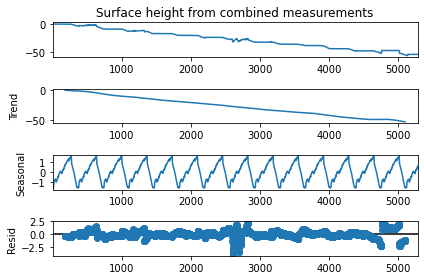

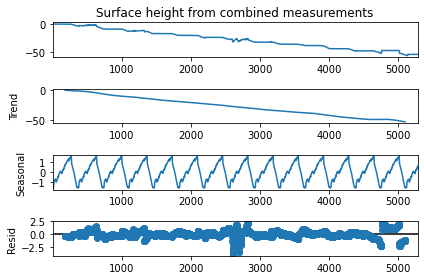

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result = seasonal_decompose(df["Surface height from combined measurements"], model="additive", period=365)

# Plot the decomposed components
result.plot()

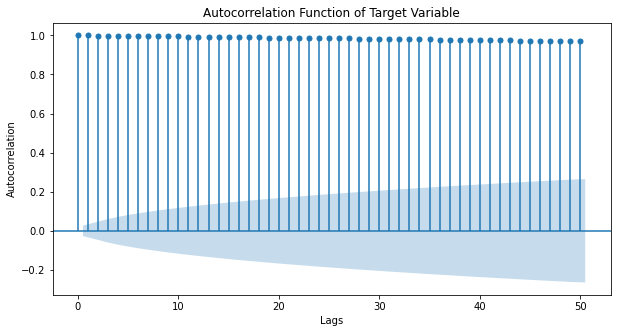

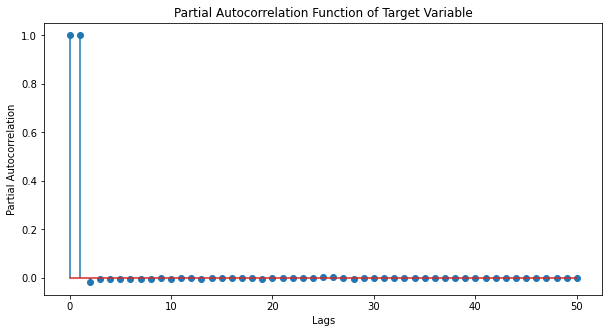

In [95]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf


# Calculate the autocorrelation function of the target variable
lags = 50  # number of lags to include in the analysis
acf_vals = acf(y, nlags=lags, fft=False)

# Plot the autocorrelation function
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(y, lags=lags, ax=ax)
ax.set(title="Autocorrelation Function of Target Variable", xlabel="Lags", ylabel="Autocorrelation")
plt.show()

# Calculate the partial autocorrelation function of the target variable
pacf_vals = pacf(y, nlags=lags)

# Plot the partial autocorrelation function
fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(range(lags+1), pacf_vals, use_line_collection=True)
ax.set(title="Partial Autocorrelation Function of Target Variable", xlabel="Lags", ylabel="Partial Autocorrelation")
plt.show()


### Cross-correlation analysis

Text(0.5, 1.0, 'Cross-Correlation between Input Variables and Target Variable')

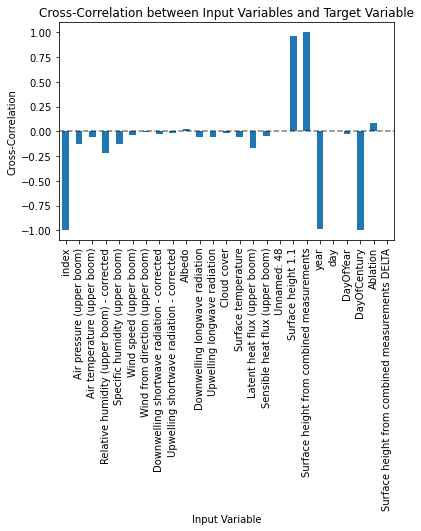

In [97]:
# Explain the results
# The plot shows the cross-correlation values between each input variable and the target variable.
# A positive cross-correlation value indicates a positive relationship between the input variable and the target variable,
# while a negative value indicates a negative relationship. The magnitude of the value indicates the strength of the relationship.
# The plot can be used to identify which input variables have the strongest relationship with the target variable.


# Compute the cross-correlation between each input variable and the target variable
corr = df.corrwith(y)

# Plot the cross-correlation values
fig, ax = plt.subplots()
corr.plot(kind='bar', ax=ax)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel('Input Variable')
ax.set_ylabel('Cross-Correlation')
ax.set_title('Cross-Correlation between Input Variables and Target Variable')


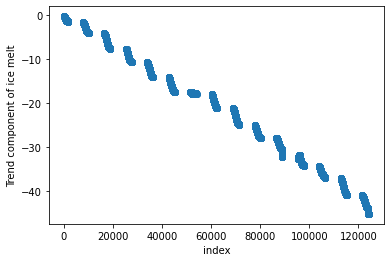

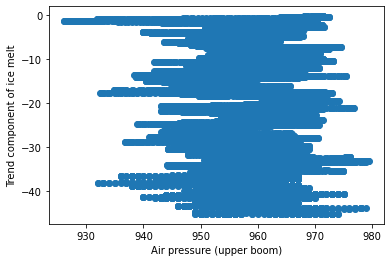

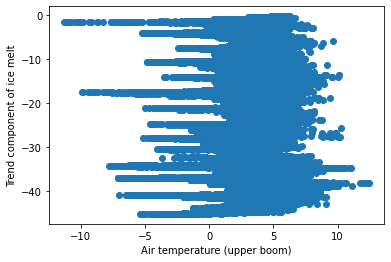

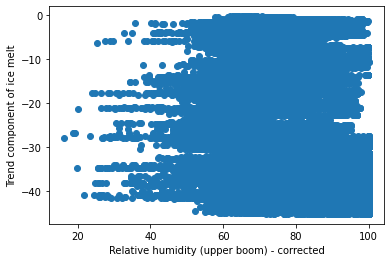

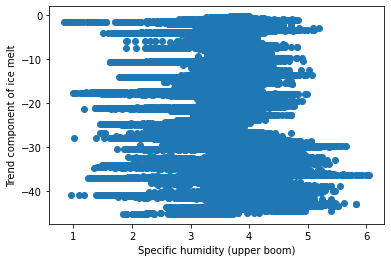

In [49]:
# To visualize the relationship between each input variable and the trend component
# we can create scatter plots with the trend component on the y-axis
# and the input variable on the x-axis. Here is the code to create scatter plots 
# for the top 5 input variables with the highest correlation values:

# Create scatter plots for the top 5 input variables
top_vars = list(corr.keys())[:5]
for var in top_vars:
    plt.scatter(X[var], result.trend)
    plt.xlabel(var)
    plt.ylabel("Trend component of ice melt")
    plt.show()

### Partial correlation analysis

Input variable pairs significantly correlated with the target variable:
Surface height from combined measurements and index
Air temperature (upper boom) and Albedo
Air temperature (upper boom) and Upwelling longwave radiation
Air temperature (upper boom) and Surface temperature
Air temperature (upper boom) and Sensible heat flux (upper boom)
Relative humidity (upper boom) - corrected and Specific humidity (upper boom)
Downwelling longwave radiation and Relative humidity (upper boom) - corrected
Cloud cover and Relative humidity (upper boom) - corrected
Latent heat flux (upper boom) and Relative humidity (upper boom) - corrected
Sensible heat flux (upper boom) and Wind speed (upper boom)
Downwelling shortwave radiation - corrected and Upwelling shortwave radiation - corrected
Cloud cover and Downwelling longwave radiation


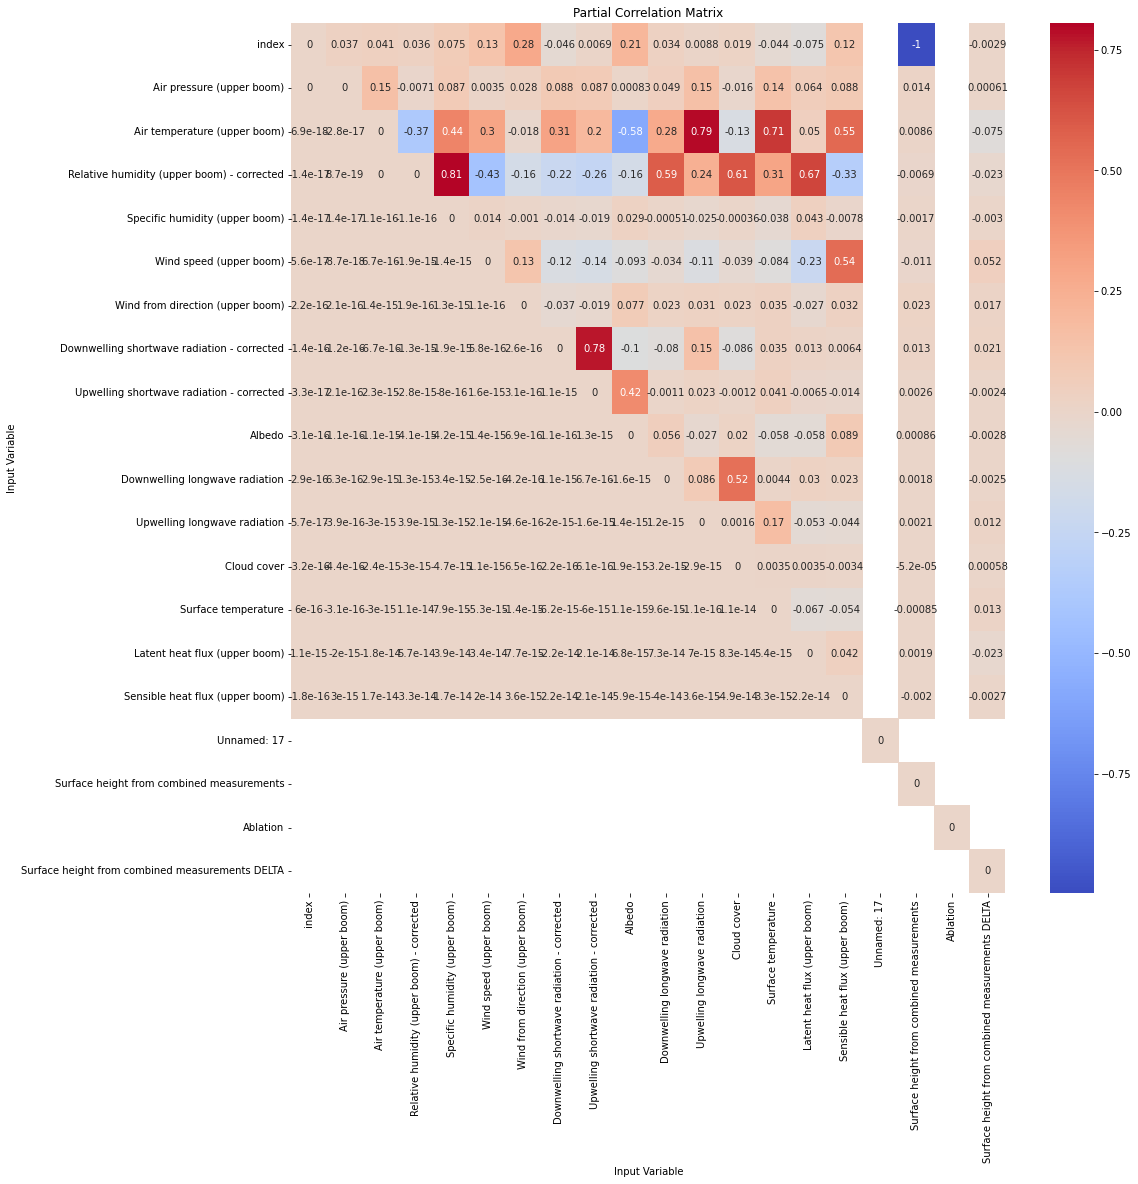

In [43]:
# The heatmap shows the partial correlation values between each input variable and the target variable,
# The partial correlation matrix is computed by subtracting the effects of all other input variables 
# from the correlation values, using the matrix inversion lemma

# Compute the correlation matrix between the input variables
corr_matrix = df.corr()

# Compute the partial correlation matrix between the input variables and the target variable
partial_corr_matrix = pd.DataFrame(np.zeros_like(corr_matrix), index=corr_matrix.index, columns=corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i != j:
            partial_corr_matrix.iloc[i, j] = (corr_matrix.iloc[i, j] - 
                                              corr_matrix.iloc[i, :i].dot(np.linalg.inv(corr_matrix.iloc[:i, :i])).dot(corr_matrix.iloc[:i, j]))

# Plot the partial correlation matrix
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xlabel('Input Variable')
ax.set_ylabel('Input Variable')
ax.set_title('Partial Correlation Matrix')

# Identify the input variables that are significantly correlated with the target variable
significant_vars = list(partial_corr_matrix[(partial_corr_matrix.abs() > 0.5) & (partial_corr_matrix != 1)].stack().index)
significant_vars = [(x, y) if x < y else (y, x) for (x, y) in significant_vars]

# Print the input variable pairs that are significantly correlated with the target variable
if significant_vars:
    print('Input variable pairs significantly correlated with the target variable:')
    for (var1, var2) in significant_vars:
        print(f'{var1} and {var2}')
else:
    print('No input variable pairs significantly correlated with the target variable.')

### Granger causaility
Doesn't work with Nan values

In [29]:
'''
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt


# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values
df.dropna(inplace=True)

# Define the maximum lag to test for Granger causality
maxlag = 12

# Perform the Granger causality test for each input variable
causality = {}
for col in df.columns[:-1]:
    test = grangercausalitytests(df[[col, 'Surface height from combined measurements']], maxlag=maxlag, verbose=False)
    p_values = [test[i+1][0]['ssr_ftest'][1] for i in range(maxlag)]
    causality[col] = np.mean(p_values)

# Sort the results in descending order of causality strength
causality = {k: v for k, v in sorted(causality.items(), key=lambda item: item[1], reverse=True)}

# Print the results
print('Granger causality results:')
for col, c in causality.items():
    print(f"{col}: {c}")

# Plot the time series for each input variable and the target variable
fig, axes = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(8, 16))
for i, col in enumerate(df.columns[:-1]):
    axes[i].plot(df[col])
    axes[i].plot(df['Surface height from combined measurements'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

'''

'\nfrom statsmodels.tsa.stattools import grangercausalitytests\nimport matplotlib.pyplot as plt\n\n\n# Replace inf values with NaN\ndf.replace([np.inf, -np.inf], np.nan, inplace=True)\n\n# Drop any rows with NaN values\ndf.dropna(inplace=True)\n\n# Define the maximum lag to test for Granger causality\nmaxlag = 12\n\n# Perform the Granger causality test for each input variable\ncausality = {}\nfor col in df.columns[:-1]:\n    test = grangercausalitytests(df[[col, \'Surface height from combined measurements\']], maxlag=maxlag, verbose=False)\n    p_values = [test[i+1][0][\'ssr_ftest\'][1] for i in range(maxlag)]\n    causality[col] = np.mean(p_values)\n\n# Sort the results in descending order of causality strength\ncausality = {k: v for k, v in sorted(causality.items(), key=lambda item: item[1], reverse=True)}\n\n# Print the results\nprint(\'Granger causality results:\')\nfor col, c in causality.items():\n    print(f"{col}: {c}")\n\n# Plot the time series for each input variable and the 

In [31]:
'''
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Define a function to perform Granger causality analysis
def granger_causality(X, y, maxlag):
    # Concatenate X and y into one dataframe
    df = pd.concat([X, y], axis=1)
    # Perform Granger causality analysis
    results = grangercausalitytests(df, maxlag=maxlag, verbose=False)
    # Extract p-values from the results
    p_values = [results[i+1][0]['ssr_ftest'][1] for i in range(maxlag)]
    # Return the p-values
    return p_values

# Set the maximum lag for the Granger causality analysis
maxlag = 10

# Perform Granger causality analysis on each input variable
for col in X.columns:
    # Calculate the p-values for the Granger causality analysis
    p_values = granger_causality(X.drop(columns=[col]), y, maxlag)
    # Plot the p-values
    plt.plot(range(1, maxlag+1), p_values)
    plt.title(f"Granger Causality of {col} on Ice Melt")
    plt.xlabel("Lag Order")
    plt.ylabel("p-value")
    plt.show()
'''


'\nimport statsmodels.api as sm\nfrom statsmodels.tsa.stattools import grangercausalitytests\n\n# Define a function to perform Granger causality analysis\ndef granger_causality(X, y, maxlag):\n    # Concatenate X and y into one dataframe\n    df = pd.concat([X, y], axis=1)\n    # Perform Granger causality analysis\n    results = grangercausalitytests(df, maxlag=maxlag, verbose=False)\n    # Extract p-values from the results\n    p_values = [results[i+1][0][\'ssr_ftest\'][1] for i in range(maxlag)]\n    # Return the p-values\n    return p_values\n\n# Set the maximum lag for the Granger causality analysis\nmaxlag = 10\n\n# Perform Granger causality analysis on each input variable\nfor col in X.columns:\n    # Calculate the p-values for the Granger causality analysis\n    p_values = granger_causality(X.drop(columns=[col]), y, maxlag)\n    # Plot the p-values\n    plt.plot(range(1, maxlag+1), p_values)\n    plt.title(f"Granger Causality of {col} on Ice Melt")\n    plt.xlabel("Lag Order")\n